In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.io as io
from settings_config import *
from dimensionality_reduction import *
from preprocessing import *
from scipy.stats import ranksums
from matplotlib.lines import Line2D

In [2]:
plt.rcParams.update({'font.family':'serif'})

## Get data

In [3]:
# Get data from csv
likelihood_EMT46_2, positions_EMT46_2, angles_EMT46_2 = get_likelihood_positions_angles_nans(EMT46_2_path,length_EMT46_2,\
                                                                              likelihood_threshold=0.75,labels_format='46/16')
likelihood_EMT16, positions_EMT16, angles_EMT16 = get_likelihood_positions_angles_nans(EMT16_path,length_EMT16,\
                                                                              likelihood_threshold=0.8,labels_format='46/16')
likelihood_EMT19, positions_EMT19, angles_EMT19 = get_likelihood_positions_angles_nans(EMT19_path,length_EMT19,\
                                                                                              likelihood_threshold=0.75)
likelihood_EMT28, positions_EMT28, angles_EMT28 = get_likelihood_positions_angles_nans(EMT28_path,length_EMT28,\
                                                                                              likelihood_threshold=0.75)
likelihood_EMT48, positions_EMT48, angles_EMT48 = get_likelihood_positions_angles_nans(EMT48_path,length_EMT48,\
                                                                                              likelihood_threshold=0.75)
likelihood_EMT17, positions_EMT17, angles_EMT17 = get_likelihood_positions_angles_nans(EMT17_path,length_EMT17,\
                                                                                              likelihood_threshold=0.75)
likelihood_EMT47, positions_EMT47, angles_EMT47 = get_likelihood_positions_angles_nans(EMT47_path,length_EMT47,\
                                                                                              likelihood_threshold=0.75)
likelihood_EMT18, positions_EMT18, angles_EMT18 = get_likelihood_positions_angles_nans(EMT18_path,length_EMT18,\
                                                                                              likelihood_threshold=0.75)

In [4]:
# Centering and normalizing angles
angles_EMT16_center = center(angles_EMT16)
angles_EMT46_2_center = center(angles_EMT46_2)
angles_EMT19_center = center(angles_EMT19)
angles_EMT28_center = center(angles_EMT28)
angles_EMT17_center = center(angles_EMT17)
angles_EMT48_center = center(angles_EMT48)
angles_EMT18_center = center(angles_EMT18)
angles_EMT47_center = center(angles_EMT47)

angles_EMT16_normalized__ = normalize_angles_range(angles_EMT16)
angles_EMT46_2_normalized__ = normalize_angles_range(angles_EMT46_2)
angles_EMT19_normalized__ = normalize_angles_range(angles_EMT19)
angles_EMT28_normalized__ = normalize_angles_range(angles_EMT28)
angles_EMT17_normalized__ = normalize_angles_range(angles_EMT17)
angles_EMT48_normalized__ = normalize_angles_range(angles_EMT48)
angles_EMT18_normalized__ = normalize_angles_range(angles_EMT18)
angles_EMT47_normalized__ = normalize_angles_range(angles_EMT47)

angles_EMT16_normalized = center(angles_EMT16_normalized__)
angles_EMT46_2_normalized = center(angles_EMT46_2_normalized__)
angles_EMT19_normalized = center(angles_EMT19_normalized__)
angles_EMT28_normalized = center(angles_EMT28_normalized__)
angles_EMT17_normalized = center(angles_EMT17_normalized__)
angles_EMT48_normalized = center(angles_EMT48_normalized__)
angles_EMT18_normalized = center(angles_EMT18_normalized__)
angles_EMT47_normalized = center(angles_EMT47_normalized__)

# Getting angular velocity

angular_velocity_EMT16 = center(abs(np.diff(angles_EMT16)))
angular_velocity_EMT46_2 = center(abs(np.diff(angles_EMT46_2)))
angular_velocity_EMT19 = center(abs(np.diff(angles_EMT19)))
angular_velocity_EMT28 = center(abs(np.diff(angles_EMT28)))
angular_velocity_EMT17 = center(abs(np.diff(angles_EMT17)))
angular_velocity_EMT18 = center(abs(np.diff(angles_EMT18)))
angular_velocity_EMT47 = center(abs(np.diff(angles_EMT47)))
angular_velocity_EMT48 = center(abs(np.diff(angles_EMT48)))

# Delete nans and trunk

angles_EMT16_ = np.delete(delete_nans(angles_EMT16_center), [8,9,10,11], 0) # Delete trunk
angles_EMT46_2_ = np.delete(delete_nans(angles_EMT46_2_center), [8,9,10,11], 0) # Delete trunk
angles_EMT19_ = np.delete(delete_nans(angles_EMT19_center), [8,9,10,11], 0) # Delete trunk
angles_EMT28_ = np.delete(delete_nans(angles_EMT28_center), [8,9,10,11], 0) # Delete trunk
angles_EMT17_ = np.delete(delete_nans(angles_EMT17_center), [8,9,10,11], 0) # Delete trunk
angles_EMT48_ = np.delete(delete_nans(angles_EMT48_center), [8,9,10,11], 0) # Delete trunk
angles_EMT18_ = np.delete(delete_nans(angles_EMT18_center), [8,9,10,11], 0) # Delete trunk
angles_EMT47_ = np.delete(delete_nans(angles_EMT47_center), [8,9,10,11], 0) # Delete trunk

angles_EMT16_normalized_ = np.delete(delete_nans(angles_EMT16_normalized), [8,9,10,11], 0) # Delete trunk
angles_EMT46_2_normalized_ = np.delete(delete_nans(angles_EMT46_2_normalized), [8,9,10,11], 0) # Delete trunk
angles_EMT19_normalized_ = np.delete(delete_nans(angles_EMT19_normalized), [8,9,10,11], 0) # Delete trunk
angles_EMT28_normalized_ = np.delete(delete_nans(angles_EMT28_normalized), [8,9,10,11], 0) # Delete trunk
angles_EMT17_normalized_ = np.delete(delete_nans(angles_EMT17_normalized), [8,9,10,11], 0) # Delete trunk
angles_EMT48_normalized_ = np.delete(delete_nans(angles_EMT48_normalized), [8,9,10,11], 0) # Delete trunk
angles_EMT18_normalized_ = np.delete(delete_nans(angles_EMT18_normalized), [8,9,10,11], 0) # Delete trunk
angles_EMT47_normalized_ = np.delete(delete_nans(angles_EMT47_normalized), [8,9,10,11], 0) # Delete trunk

angular_velocity_EMT16_ = np.delete(delete_nans(angular_velocity_EMT16), [8,9,10,11], 0) # Delete trunk
angular_velocity_EMT46_2_ = np.delete(delete_nans(angular_velocity_EMT46_2), [8,9,10,11], 0) # Delete trunk
angular_velocity_EMT19_ = np.delete(delete_nans(angular_velocity_EMT19), [8,9,10,11], 0) # Delete trunk
angular_velocity_EMT28_ = np.delete(delete_nans(angular_velocity_EMT28), [8,9,10,11], 0) # Delete trunk
angular_velocity_EMT17_ = np.delete(delete_nans(angular_velocity_EMT17), [8,9,10,11], 0) # Delete trunk
angular_velocity_EMT18_ = np.delete(delete_nans(angular_velocity_EMT18), [8,9,10,11], 0) # Delete trunk
angular_velocity_EMT47_ = np.delete(delete_nans(angular_velocity_EMT47), [8,9,10,11], 0) # Delete trunk
angular_velocity_EMT48_ = np.delete(delete_nans(angular_velocity_EMT48), [8,9,10,11], 0) # Delete trunk


max_trunk: 2.079783706445542
min_trunk: 0.9923816965035062
max_head: 2.23897432946313
min_head: 0.3685154091621472
max_trunk: 2.0214708449697034
min_trunk: 1.1453969039960248
max_head: 1.7042925136926457
min_head: 0.539512627292701
max_trunk: 2.0373711938935326
min_trunk: 1.0855316914204534
max_head: 2.1834501346486306
min_head: 0.227843898014761
max_trunk: 2.5334200975249717
min_trunk: 0.9170555901839543
max_head: 2.0837342068907163
min_head: 0.3547850491238438
max_trunk: 2.337428970221393
min_trunk: 0.8328018885338291
max_head: 1.9214796987300597
min_head: 0.3434570039161501
max_trunk: 2.4932417371170157
min_trunk: 0.747927733120133
max_head: 1.4815567883169707
min_head: 0.4246912400443352
max_trunk: 2.2164617667366215
min_trunk: 1.0196342565384882
max_head: 1.6545388641907224
min_head: 0.4206347637233989
max_trunk: 2.2745717951404107
min_trunk: 0.8910399873160797
max_head: 1.3549158785117363
min_head: 0.5137570833474584
There are 4207 frames with high likelihood
There are 5927 frame

In [4]:
def PCA_2_videos_raw_norm2(angles_EMT45_, angles_subject45,
                                angles_EMT45_normalized_, angles_subject45_normalized_,
                               videos,
                                label = 'angles'):
    PCs_raw_EMT45,cum_var_raw_EMT45 = perform_PCA(angles_EMT45_)
    PCs_raw_EMTsubject45,cum_var_raw_subject45 = perform_PCA(angles_subject45)
    PCs_normalized_EMT45,cum_var_normalized_EMT45 = perform_PCA(angles_EMT45_normalized_)
    PCs_normalized_subject45,cum_var_normalized_subject45 = perform_PCA(angles_subject45_normalized_)
    
    fig = plt.figure(figsize=(10,4));  
    plt.suptitle('Cumulative Explained Variance (PCA on {})'.format(label),size=titles_font_size, y=1.1)
    plt.subplot(1,2,1);
    plot_cum_expl_var_raw_norm(cum_var_raw_EMT45,cum_var_normalized_EMT45,videos[0])
    plt.subplot(1,2,2);
    plot_cum_expl_var_raw_norm(cum_var_raw_subject45,cum_var_normalized_subject45,videos[1])
    plt.show();
    
    labels = ['L elbow','R elbow','L knee','R knee',
            'L arm','R arm','L leg','R leg',
            'L head','R head']
    
    fig, ax = plt.subplots(2,2,figsize=(12,13))
    plt.suptitle('PCs (PCA on {})'.format(label),y=0.91,size=titles_font_size)
    plot_PCs(PCs_raw_EMT45,fig, ax[0,0],'Raw {}'.format(videos[0]),labels)
    plot_PCs(PCs_normalized_EMT45,fig, ax[1,0],'Norm. {}'.format(videos[0]),labels)
    plot_PCs(PCs_raw_EMTsubject45,fig, ax[0,1],'Raw {}'.format(videos[1]),labels)
    plot_PCs(PCs_normalized_subject45,fig, ax[1,1],'Norm. {}'.format(videos[1]),labels)

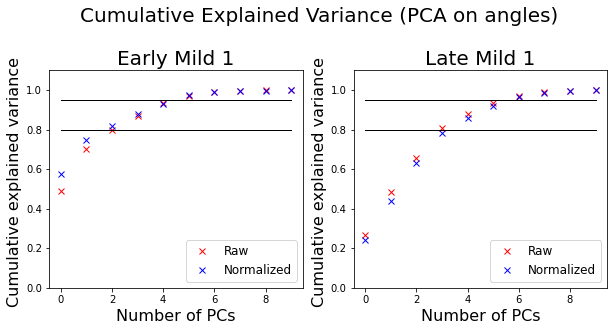

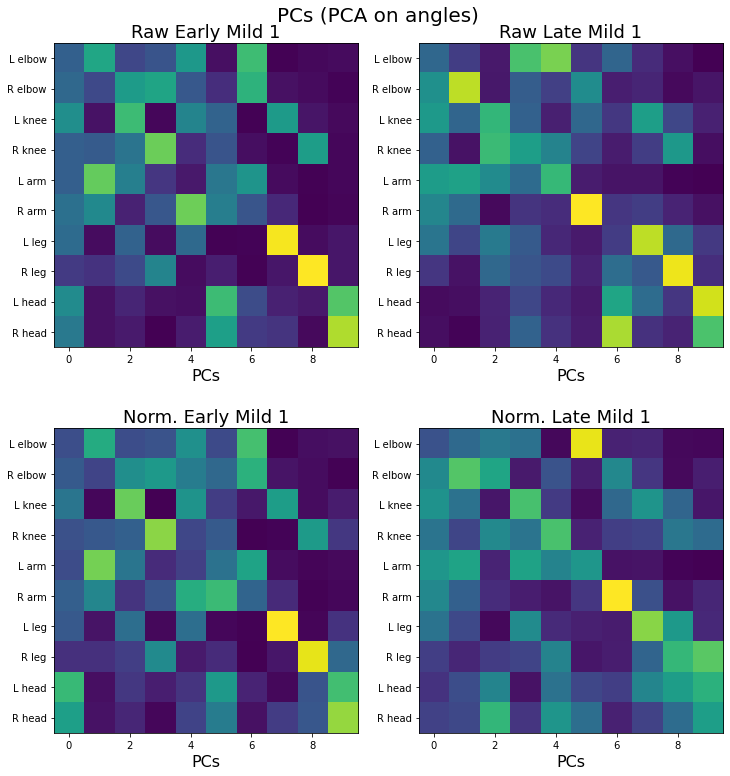

In [5]:
PCA_2_videos_raw_norm2(angles_EMT19_,angles_EMT28_,angles_EMT19_normalized_,angles_EMT28_normalized_,videos=["Early Mild 1","Late Mild 1" ], label = 'angles')


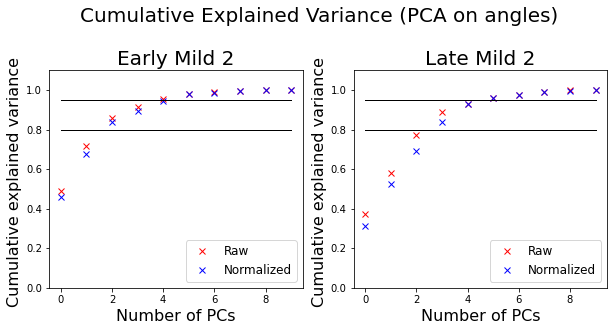

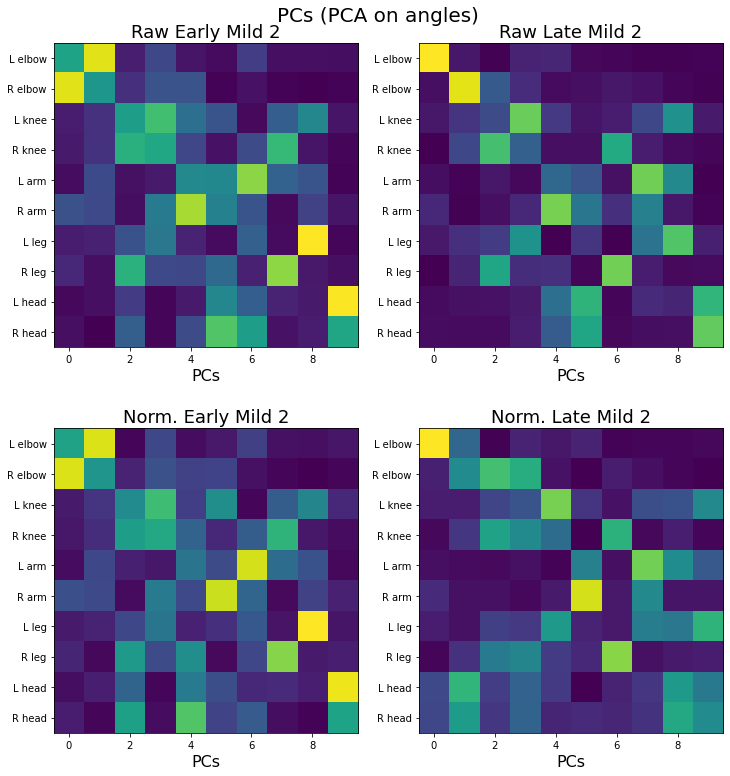

In [6]:
PCA_2_videos_raw_norm2(angles_EMT16_,angles_EMT46_2_,angles_EMT16_normalized_,angles_EMT46_2_normalized_,videos=["Early Mild 2","Late Mild 2" ], label = 'angles')


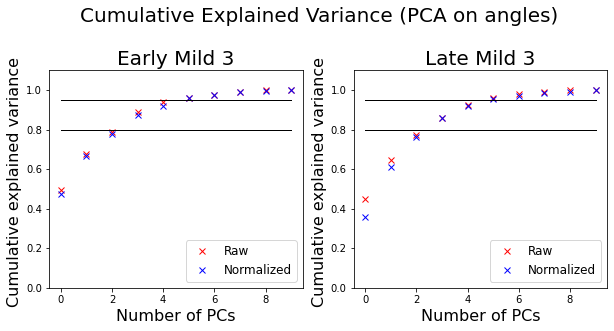

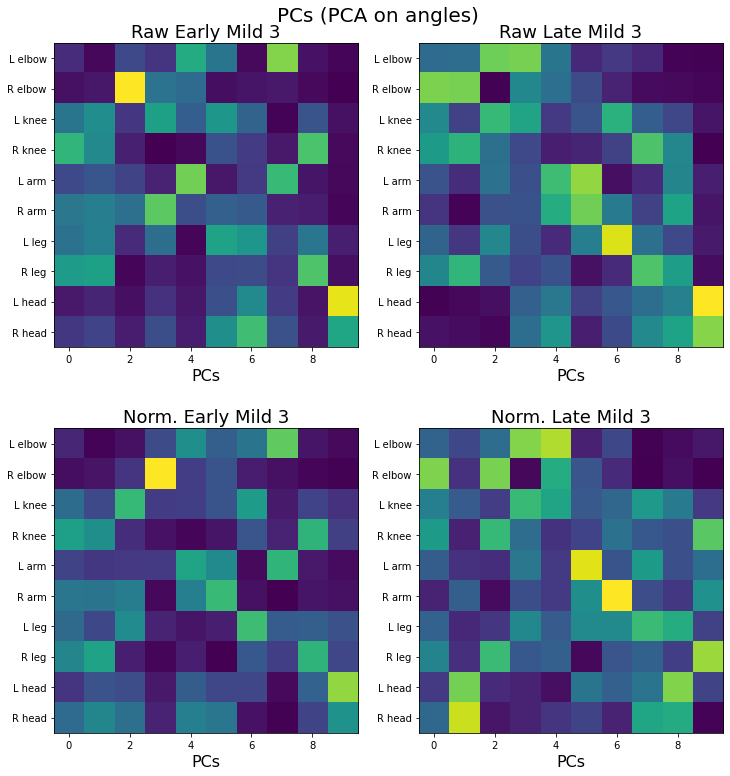

In [9]:
PCA_2_videos_raw_norm2(angles_EMT17_,angles_EMT48_,angles_EMT17_normalized_,angles_EMT48_normalized_,videos=["Early Mild 3","Late Mild 3" ], label = 'angles')

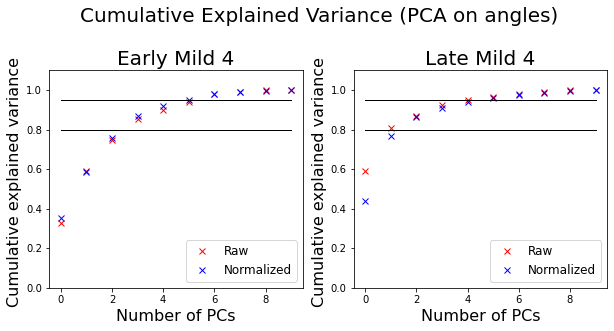

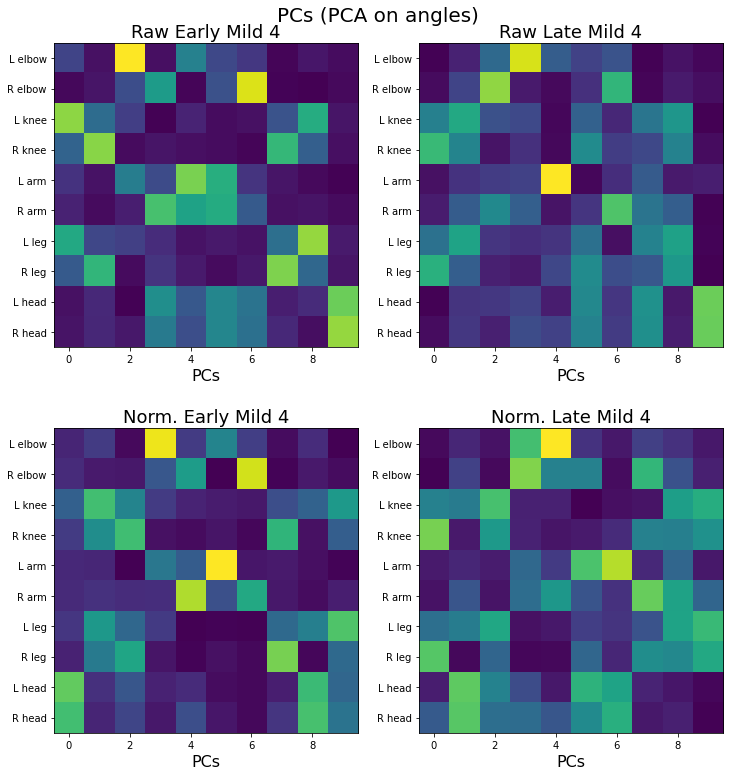

In [10]:
PCA_2_videos_raw_norm2(angles_EMT18_,angles_EMT47_,angles_EMT18_normalized_,angles_EMT47_normalized_,videos=["Early Mild 4","Late Mild 4" ], label = 'angles')

In [8]:
small_dim = 3
interm_dim = 6
big_dim = 9

In [5]:
# Angles normalized
early_angles_norm = [angles_EMT19_normalized_,angles_EMT16_normalized_,angles_EMT17_normalized_,angles_EMT18_normalized_ ]
late_angles_norm = [angles_EMT28_normalized_,angles_EMT46_2_normalized_,angles_EMT48_normalized_,angles_EMT47_normalized_]

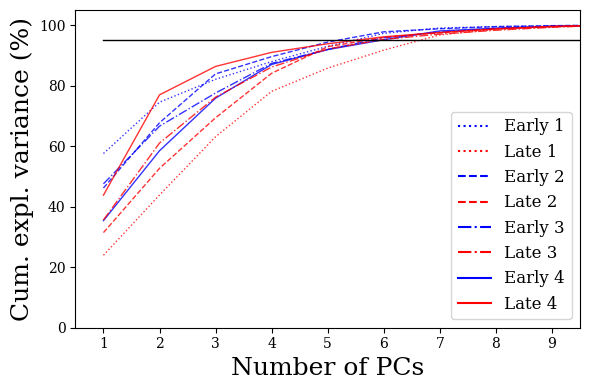

In [6]:
cum_expl_var_early_late(early_angles_norm+late_angles_norm)#,save_fig='cum_expl_var_no_trunk')

[82.09306252566424, 83.89220872486054, 77.57297952376766, 75.87199560372514]
[63.11699871410678, 69.38935645728257, 76.20877973865177, 86.35476230112988]


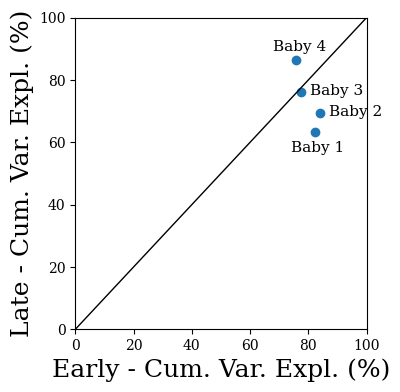

In [7]:
plot_early_vs_late_cum_var(early_angles_norm,late_angles_norm,3)#,save_fig='early_vs_late_expl_var')